𝟏. 𝐈𝐦𝐩𝐨𝐫𝐭𝐢𝐧𝐠 𝐍𝐞𝐜𝐞𝐬𝐬𝐚𝐫𝐲 𝐋𝐢𝐛𝐫𝐚𝐫𝐢𝐞𝐬

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Outliers
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
# Warnings
import warnings
warnings.filterwarnings("ignore")



𝟐. 𝐋𝐨𝐚𝐝𝐢𝐧𝐠 𝐭𝐡𝐞 𝐃𝐚𝐭𝐚𝐬𝐞𝐭

In [2]:
file_path = r'C:\Users\Jaya T\Desktop\Spinnaker Analytics\Introduction Your Research Project\NYPD_Shooting_Incident_Data__Historic_.csv'
df = pd.read_csv(file_path)
df.head(4)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)


𝟑. 𝐃𝐚𝐭𝐚 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬

In [3]:
data_size = df.shape
data_size

(27312, 21)

In [4]:
dtype = df.info()
dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  object 
 2   OCCUR_TIME               27312 non-null  object 
 3   BORO                     27312 non-null  object 
 4   LOC_OF_OCCUR_DESC        1716 non-null   object 
 5   PRECINCT                 27312 non-null  int64  
 6   JURISDICTION_CODE        27310 non-null  float64
 7   LOC_CLASSFCTN_DESC       1716 non-null   object 
 8   LOCATION_DESC            12335 non-null  object 
 9   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 10  PERP_AGE_GROUP           17968 non-null  object 
 11  PERP_SEX                 18002 non-null  object 
 12  PERP_RACE                18002 non-null  object 
 13  VIC_AGE_GROUP            27312 non-null  object 
 14  VIC_SEX               

In [5]:
columns = df.columns
columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC',
       'PRECINCT', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC',
       'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
       'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'Lon_Lat'],
      dtype='object')

In [6]:
null_values = df.isnull().sum()
null_values

INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
LOC_OF_OCCUR_DESC          25596
PRECINCT                       0
JURISDICTION_CODE              2
LOC_CLASSFCTN_DESC         25596
LOCATION_DESC              14977
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              9344
PERP_SEX                    9310
PERP_RACE                   9310
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                      10
Longitude                     10
Lon_Lat                       10
dtype: int64

𝟒. 𝐄𝐱𝐩𝐥𝐨𝐫𝐚𝐭𝐨𝐫𝐲 𝐃𝐚𝐭𝐚 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬

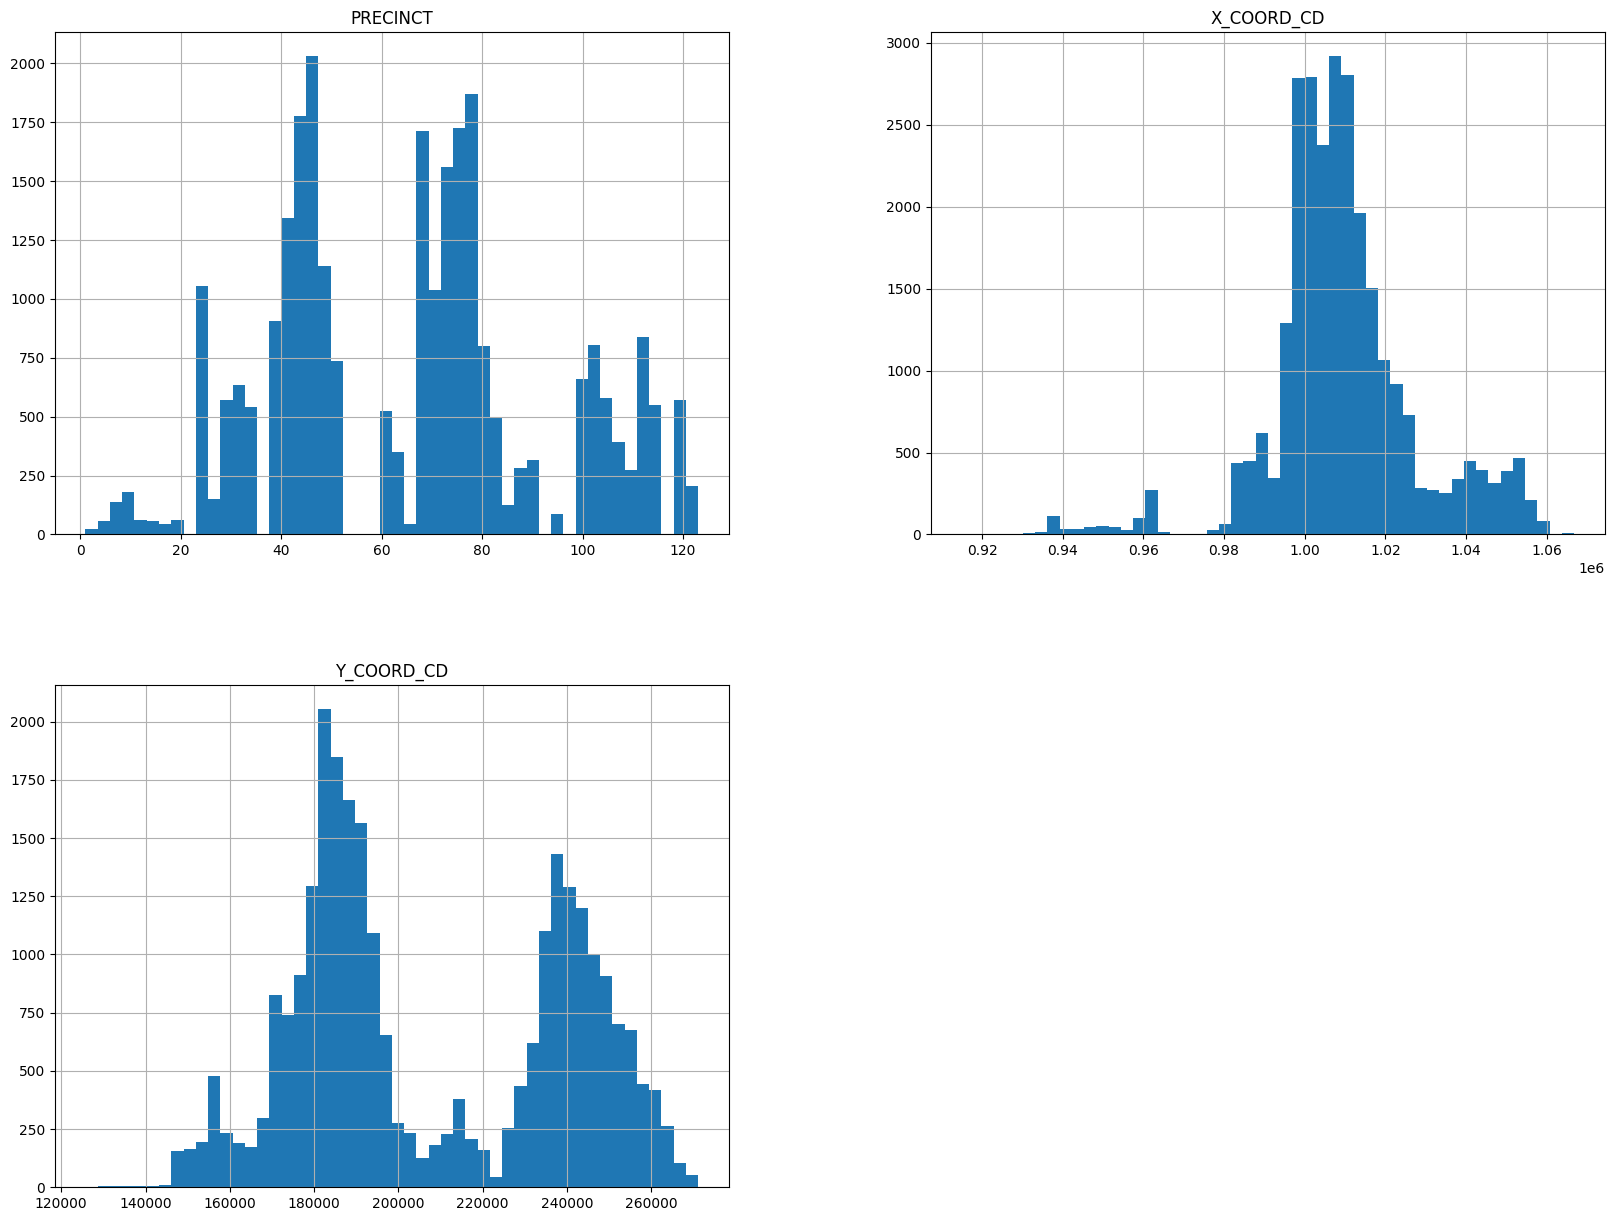

In [7]:
# Visualization - Histogram of a few numerical columns
df.hist(column=['PRECINCT', 'X_COORD_CD', 'Y_COORD_CD'], bins=50, figsize=(20, 15))
plt.show()

𝟓. 𝐃𝐚𝐭𝐚 𝐂𝐥𝐞𝐚𝐧𝐢𝐧𝐠

In [8]:
# Drop unnecessary columns
df = df.drop(['OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC', 'LOC_CLASSFCTN_DESC', 
              'LOCATION_DESC', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 
              'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'Lon_Lat'], axis=1)

In [9]:
df = df.drop(columns=['INCIDENT_KEY'])

In [10]:
df['STATISTICAL_MURDER_FLAG'] = df['STATISTICAL_MURDER_FLAG'].replace({True:1,False:0})

In [11]:
# Move the first column to the last
column_to_move = df.columns[2]  # Get the first column name
df = df[[col for col in df.columns if col != column_to_move] + [column_to_move]]


In [12]:
null_values2 = df.isnull().sum()
null_values2

PRECINCT                    0
JURISDICTION_CODE           2
X_COORD_CD                  0
Y_COORD_CD                  0
Latitude                   10
Longitude                  10
STATISTICAL_MURDER_FLAG     0
dtype: int64

In [13]:
# Fill with mean (or use median for robustness)
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].median())
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].median())
df['JURISDICTION_CODE'] = df['JURISDICTION_CODE'].fillna(df['Latitude'].median())


In [14]:
df.isnull().sum()

PRECINCT                   0
JURISDICTION_CODE          0
X_COORD_CD                 0
Y_COORD_CD                 0
Latitude                   0
Longitude                  0
STATISTICAL_MURDER_FLAG    0
dtype: int64

𝟔. 𝐎𝐮𝐭𝐥𝐢𝐞𝐫 𝐃𝐞𝐭𝐞𝐜𝐭𝐢𝐨𝐧

In [15]:
# Drop target column for box plot visualization
X = df.drop('STATISTICAL_MURDER_FLAG', axis=1)

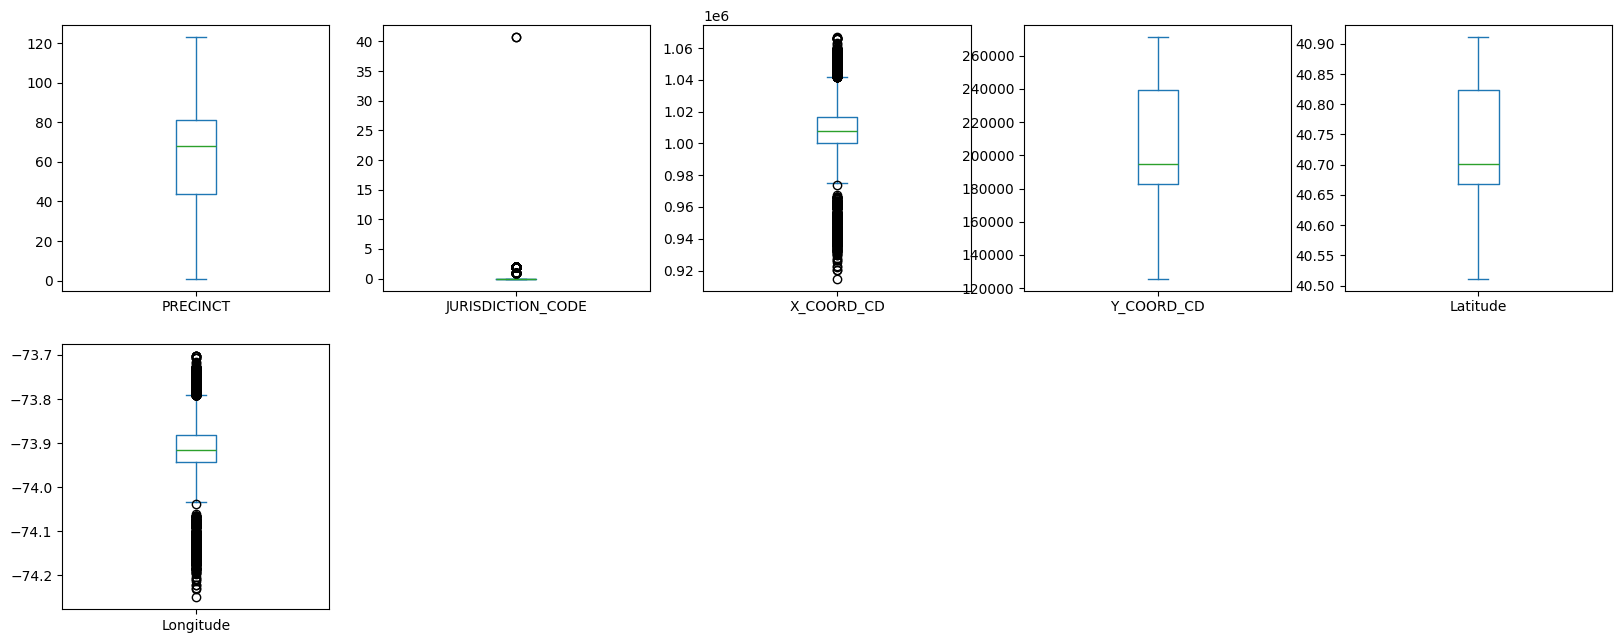

In [16]:
# Boxplot for visualizing outliers
X.plot(kind='box', subplots=True, layout=(5, 5), figsize=(20, 20))
plt.show()

𝟕. 𝐒𝐩𝐥𝐢𝐭 𝐓𝐫𝐚𝐢𝐧 𝐚𝐧𝐝 𝐓𝐞𝐬𝐭 𝐃𝐚𝐭𝐚

In [17]:
X = df.drop('STATISTICAL_MURDER_FLAG', axis=1)
y = df['STATISTICAL_MURDER_FLAG']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(f"the shape of X_train {X_train.shape}")
print(f"the shape of X_test {X_test.shape}")
print(f"the shape of y_train {y_train.shape}")
print(f"the shape of y_test {y_test.shape}")

the shape of X_train (21849, 6)
the shape of X_test (5463, 6)
the shape of y_train (21849,)
the shape of y_test (5463,)


𝟖. 𝐃𝐚𝐭𝐚 𝐒𝐭𝐚𝐧𝐝𝐚𝐫𝐝𝐢𝐳𝐚𝐭𝐢𝐨𝐧

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)  # Compute mean/std on X_train and transform it
X_test_scaled = scaler.transform(X_test)       # Transform X_test using the same parameters

print(f"the shape of X_train_scaled {X_train_scaled.shape}")
print(f"the shape of X_test_scaled {X_test_scaled.shape}")
print(f"the shape of y_train {y_train.shape}")
print(f"the shape of y_test {y_test.shape}")

the shape of X_train_scaled (21849, 6)
the shape of X_test_scaled (5463, 6)
the shape of y_train (21849,)
the shape of y_test (5463,)


In [21]:
X_train_scaled


array([[-0.20238482, -0.39784115, -0.78395581, -1.86366617, -1.86325927,
        -0.7863388 ],
       [-0.64195267, -0.39784115,  0.22610189,  1.32610069,  1.32632944,
         0.22883066],
       [-1.55771901, -0.39784115, -0.51035644,  0.63892395,  0.63949244,
        -0.51033214],
       ...,
       [ 1.33610263, -0.39784115,  0.84059165, -0.59536366, -0.59581002,
         0.83932022],
       [-0.78847528, -0.39784115, -0.29136981,  1.11455583,  1.11507018,
        -0.29029334],
       [ 0.27381368, -0.39784115, -0.03926821, -0.88718644, -0.88698548,
        -0.04112067]])

𝟗. 𝐌𝐨𝐝𝐞𝐥 𝐓𝐫𝐚𝐢𝐧𝐢𝐧𝐠 & 𝐄𝐯𝐚𝐥𝐮𝐚𝐭𝐢𝐨𝐧

In [22]:
# Import libraries for models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Initialize models
logistic_regression = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
svm = SVC()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()

# Create a dictionary of models for easy iteration
models = {
    "Logistic Regression": logistic_regression,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "SVM": svm,
    "KNN": knn,
    "Gradient Boosting": gradient_boosting,
    "Naive Bayes": naive_bayes
}

# Define a function to evaluate a single model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),  # Adjusted for multi-class support
        "Recall": recall_score(y_test, y_pred, average='weighted'),        # Adjusted for multi-class support
        "F1 Score": f1_score(y_test, y_pred, average='weighted')           # Adjusted for multi-class support
    }

# Train and evaluate each model
evaluation_metrics = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Evaluate the model
    evaluation_metrics[model_name] = evaluate_model(model, X_test_scaled, y_test)

# Convert the evaluation metrics into a DataFrame for better visualization
evaluation_df = pd.DataFrame(evaluation_metrics).T

# Display the evaluation DataFrame
print(evaluation_df)


                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.811093   0.657872  0.811093  0.726491
Decision Tree        0.764232   0.730500  0.764232  0.744214
Random Forest        0.776863   0.736205  0.776863  0.750916
SVM                  0.811093   0.657872  0.811093  0.726491
KNN                  0.782171   0.724553  0.782171  0.742916
Gradient Boosting    0.811093   0.752510  0.811093  0.727186
Naive Bayes          0.811093   0.657872  0.811093  0.726491


𝟏𝟎. 𝐎𝐮𝐭𝐥𝐢𝐞𝐫 𝐓𝐫𝐞𝐚𝐭𝐦𝐞𝐧𝐭

In [23]:
df

,PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,STATISTICAL_MURDER_FLAG
0,105,0.0,1.058925e+06,180924.000000,40.662965,-73.730839,0
1,40,0.0,1.005028e+06,234516.000000,40.810352,-73.924942,0
2,108,0.0,1.007668e+06,209836.531250,40.742607,-73.915492,1
3,44,0.0,1.006537e+06,244511.140625,40.837782,-73.919457,0
4,47,0.0,1.024922e+06,262189.406250,40.886238,-73.852910,1
...,...,...,...,...,...,...,...
27307,48,0.0,1.011526e+06,247828.000000,40.846864,-73.901413,0
27308,30,0.0,9.974580e+05,240485.000000,40.826743,-73.952273,0
27309,32,0.0,1.000999e+06,234464.000000,40.810209,-73.939496,0
27310,46,2.0,1.012980e+06,251028.000000,40.855644,-73.896141,0


In [24]:
# Preprocessing
#Since the STATISTICAL_MURDER_FLAG was a categorical column , used label encoder for safer side to change to numerical column ...
df = df.dropna(subset=['X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'STATISTICAL_MURDER_FLAG'])
label_encoder = LabelEncoder()
df['STATISTICAL_MURDER_FLAG'] = label_encoder.fit_transform(df['STATISTICAL_MURDER_FLAG'])

In [25]:
print(df.isnull().sum())

PRECINCT                   0
JURISDICTION_CODE          0
X_COORD_CD                 0
Y_COORD_CD                 0
Latitude                   0
Longitude                  0
STATISTICAL_MURDER_FLAG    0
dtype: int64


In [26]:
# Selecting features and target
features = ['X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude']
X = df[features]
y = df['STATISTICAL_MURDER_FLAG']

In [27]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Remove outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(X_scaled)
mask = outliers != -1

X_clean = X_scaled[mask]
y_clean = y[mask]


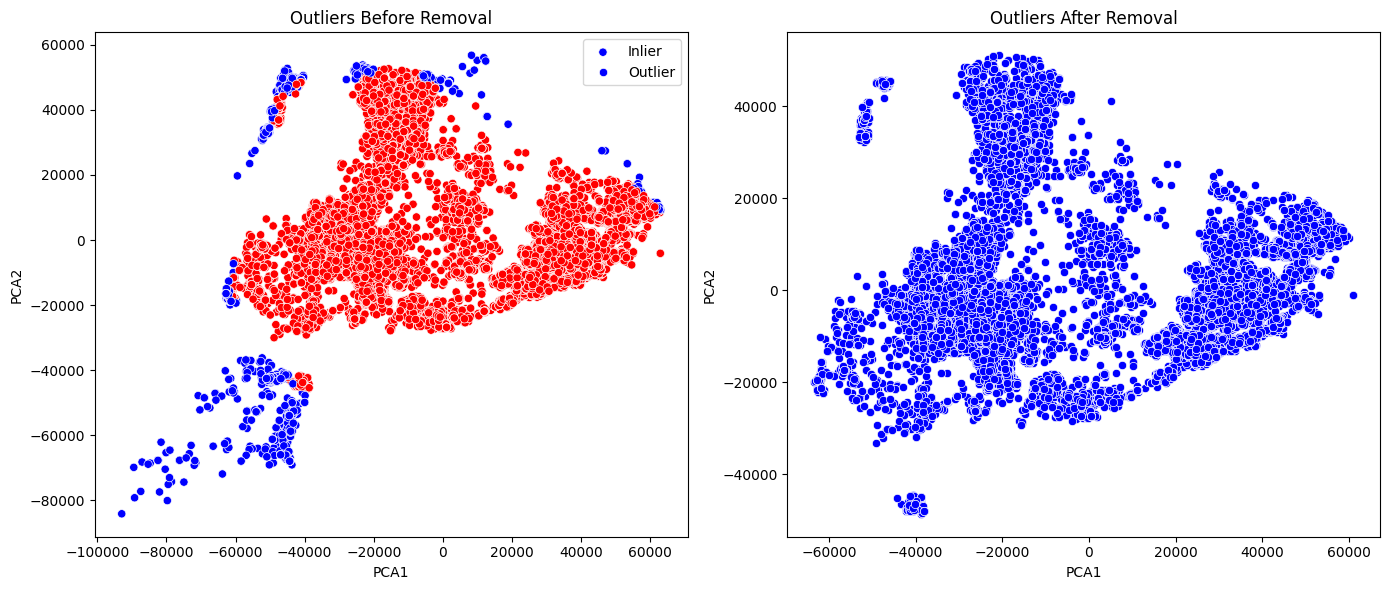

In [29]:
from sklearn.decomposition import PCA
X['outlier'] = outliers
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.drop(columns=['outlier']))
X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
X_pca_df['outlier'] = outliers

# Visualize Outliers Before Removal
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='outlier', data=X_pca_df, palette=['blue', 'red'])
plt.title('Outliers Before Removal')
plt.legend(['Inlier', 'Outlier'])

# Remove Outliers
X_clean = X[X['outlier'] == 1]

# Apply PCA again to the cleaned data
X_clean_pca = pca.fit_transform(X_clean.drop(columns=['outlier']))
X_clean_pca_df = pd.DataFrame(X_clean_pca, columns=['PCA1', 'PCA2'])

# Visualize Data After Outlier Removal
plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', data=X_clean_pca_df, color='blue')
plt.title('Outliers After Removal')

plt.tight_layout()
plt.show()

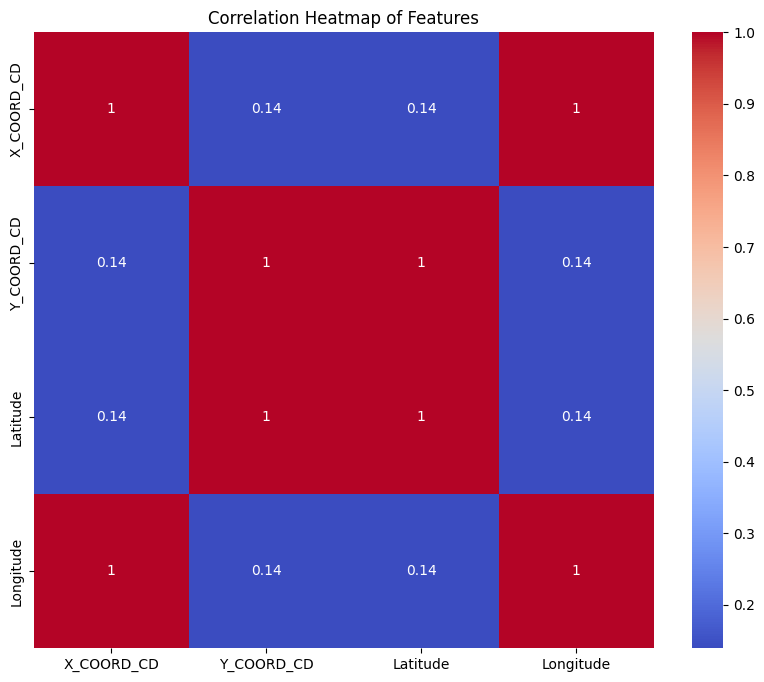

In [30]:
# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_scaled, columns=features).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

In [31]:
# Continue with model evaluation and selection
X_clean = X_clean.drop(columns=['outlier'])
X_clean_scaled = scaler.fit_transform(X_clean)

In [32]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

𝟏𝟏. 𝐌𝐨𝐝𝐞𝐥 𝐓𝐫𝐚𝐢𝐧𝐢𝐧𝐠 𝐚𝐧𝐝 𝐄𝐯𝐚𝐥𝐮𝐚𝐭𝐢𝐨𝐧

 𝐀. 𝐋𝐨𝐠𝐢𝐬𝐭𝐢𝐜 𝐑𝐞𝐠𝐫𝐞𝐬𝐬𝐢𝐨𝐧

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Initialize Logistic Regression model with class balancing
model1 = LogisticRegression(class_weight='balanced')

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', model)
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Compute metrics with weighted averaging
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Print results
print(f"{'Model':<25}{'Accuracy':<10}{'Precision':<10}{'Recall':<10}{'F1 Score':<10}")
print("="*65)
print(f"{'Logistic Regression':<25}{accuracy:<10.4f}{precision:<10.4f}{recall:<10.4f}{f1:<10.4f}")

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Model                    Accuracy  Precision Recall    F1 Score  
Logistic Regression      0.7742    0.7053    0.7742    0.7305    
Confusion Matrix:
[[3935  282]
 [ 890   83]]


𝐁. 𝐃𝐞𝐜𝐢𝐬𝐢𝐨𝐧 𝐓𝐫𝐞𝐞 𝐂𝐥𝐚𝐬𝐬𝐢𝐟𝐢𝐞𝐫

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Initialize Decision Tree model
model2 = DecisionTreeClassifier()

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', model)
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Compute metrics with weighted averaging
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"{'Model':<25}{'Accuracy':<10}{'Precision':<10}{'Recall':<10}{'F1 Score':<10}")
print("="*65)
print(f"{'Decision Tree':<25}{accuracy:<10.4f}{precision:<10.4f}{recall:<10.4f}{f1:<10.4f}")

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model                    Accuracy  Precision Recall    F1 Score  
Decision Tree            0.7742    0.7053    0.7742    0.7305    
Confusion Matrix:
[[3935  282]
 [ 890   83]]


𝐂. 𝐑𝐚𝐧𝐝𝐨𝐦 𝐅𝐨𝐫𝐞𝐬𝐭 𝐂𝐥𝐚𝐬𝐬𝐢𝐟𝐢𝐞𝐫

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Initialize Random Forest model
model3 = RandomForestClassifier(random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional for Random Forest
    ('classifier', model)
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Compute metrics with weighted averaging
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Print results
print(f"{'Model':<25}{'Accuracy':<10}{'Precision':<10}{'Recall':<10}{'F1 Score':<10}")
print("="*65)
print(f"{'Random Forest':<25}{accuracy:<10.4f}{precision:<10.4f}{recall:<10.4f}{f1:<10.4f}")

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model                    Accuracy  Precision Recall    F1 Score  
Random Forest            0.7742    0.7053    0.7742    0.7305    
Confusion Matrix:
[[3935  282]
 [ 890   83]]


𝐃. 𝐒𝐮𝐩𝐩𝐨𝐫𝐭 𝐕𝐞𝐜𝐭𝐨𝐫 𝐌𝐚𝐜𝐡𝐢𝐧𝐞

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Initialize SVM model
model4 = SVC(kernel='rbf', probability=True, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling is essential for SVM
    ('classifier', model)
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Compute metrics with weighted averaging
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')



# Print results
print(f"{'Model':<25}{'Accuracy':<10}{'Precision':<10}{'Recall':<10}{'F1 Score':<10}")
print("="*65)
print(f"{'Support Vector Machine':<25}{accuracy:<10.4f}{precision:<10.4f}{recall:<10.4f}{f1:<10.4f}")

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model                    Accuracy  Precision Recall    F1 Score  
Support Vector Machine   0.7742    0.7053    0.7742    0.7305    
Confusion Matrix:
[[3935  282]
 [ 890   83]]


𝐄. 𝐆𝐫𝐚𝐝𝐢𝐞𝐧𝐭 𝐁𝐨𝐨𝐬𝐭𝐢𝐧𝐠 𝐂𝐥𝐚𝐬𝐬𝐢𝐟𝐢𝐞𝐫

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Initialize Gradient Boosting model
model5 = GradientBoostingClassifier(random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional for Gradient Boosting
    ('classifier', model)
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Compute metrics with weighted averaging
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')



# Print results
print(f"{'Model':<25}{'Accuracy':<10}{'Precision':<10}{'Recall':<10}{'F1 Score':<10}")
print("="*65)
print(f"{'Gradient Boosting':<25}{accuracy:<10.4f}{precision:<10.4f}{recall:<10.4f}{f1:<10.4f}")

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model                    Accuracy  Precision Recall    F1 Score  
Gradient Boosting        0.7742    0.7053    0.7742    0.7305    
Confusion Matrix:
[[3935  282]
 [ 890   83]]


In [38]:
# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
     'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [39]:
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [40]:
# Evaluate models
best_model_name = None
best_model = None
best_f1_score = 0

results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append((name, accuracy, precision, recall, f1))
    
    if f1 > best_f1_score:  # Change to F1 Score for model selection
        best_f1_score = f1
        best_model_name = name
        best_model = pipeline

# Print results in a tabular format
print(f"{'Model':<25}{'Accuracy':<10}{'Precision':<10}{'Recall':<10}{'F1 Score':<10}")
print("="*65)
for name, accuracy, precision, recall, f1 in results:
    print(f"{name:<25}{accuracy:<10.4f}{precision:<10.4f}{recall:<10.4f}{f1:<10.4f}")


Model                    Accuracy  Precision Recall    F1 Score  
Logistic Regression      0.8125    0.0000    0.0000    0.0000    
Decision Tree            0.7536    0.2624    0.1737    0.2090    
Random Forest            0.7713    0.2934    0.1562    0.2039    
Gradient Boosting        0.8127    0.6667    0.0021    0.0041    
Support Vector Machine   0.8125    0.0000    0.0000    0.0000    
Naive Bayes              0.8125    0.0000    0.0000    0.0000    
K-Nearest Neighbors      0.7742    0.2274    0.0853    0.1241    


𝟏𝟐. 𝐂𝐡𝐨𝐨𝐬𝐢𝐧𝐠 𝐭𝐡𝐞 𝐁𝐞𝐬𝐭 𝐌𝐨𝐝𝐞𝐥 

In [41]:
import pickle

In [42]:
# Save the trained pipeline as a pickle file
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)
print("Model saved as 'logistic_regression_model.pkl'")

Model saved as 'logistic_regression_model.pkl'


In [43]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

# Load the saved Logistic Regression model
with open('logistic_regression_model.pkl', 'rb') as file:
    model = pickle.load(file)

# App layout
st.title("Law Enforcement Agencies Prediction App")
st.markdown("Enter the input features to predict:")

# Input fields
X_COORD_CD = st.number_input("X COORD CD", value=0.0)
Y_COORD_CD = st.number_input("Y COORD CD", value=0.0)
Latitude = st.number_input("Latitude", value=0.0)
Longitude = st.number_input("Longitude", value=0.0)

# Create input array
input_data = np.array([[X_COORD_CD, Y_COORD_CD, Latitude, Longitude]])

# Submit button
if st.button("Submit"):
    # Make prediction
    prediction = model.predict(input_data)[0]
    # Display prediction
    result = 'Fatal' if prediction == 1 else 'Non-Fatal'
    st.subheader(f"Output: {result}")

# Flag button (placeholder)
if st.button("Flag"):
    st.warning("Flagging functionality is not implemented.")


Overwriting app.py


In [54]:
!streamlit run app.py

^C
